In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import lxml.html as lh

In [2]:
!pip install requests
!pip install lxml

<b> Grab data from the website</b>

In [3]:
bike = 'https://www.worldometers.info/bicycles/' #assign the web page

page = requests.get(bike) # create a handle to for contents of the bike page

doc = lh.fromstring(page.content) # store content of the bike page under doc

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12 row

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

<b> Check the table header</b>

In [17]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0
for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:Country 
2:Quantity
3:Year


<b> Check the data in other rows</b>

In [5]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row

    if len(T)!=3: #if row is not size 3, //tr data is not from the table.
        break

    i = 0 #i is the index of the first column

    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()

        col[i][1].append(data) #append the data to the empty list of the i'th column

        i+=1 #increment i for the next column

<b> To see the No of Rows and Columns</b>

In [6]:
[len(C) for (title,C) in col]

[25, 25, 25]

<b> Create a dataframe and read the file</b>

In [7]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [8]:
df.head()

,Country,Quantity,Year
0,,,
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996


In [9]:
df.tail()

,Country,Quantity,Year
20,Switzerland,"3,800,000",1996
21,Hungary,"3,500,000",1995
22,Australia,"3,300,000",1995
23,Finland,"3,250,000",1995
24,Norway,"3,000,000",1995


In [10]:
df

,Country,Quantity,Year
0,,,
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996
5,India,"30,800,000",1990
6,Indonesia,"22,300,000",1982
7,Italy,"23,000,000",1995
8,UK,"20,000,000",1995
9,France,"20,000,000",1995


In [11]:
df.shape

(25, 3)

In [12]:
df.dtypes

,0
Country,object
Quantity,object
Year,object


<h2> Data Cleaning</h2>

<h3>1. Drop Row 0<h3/>

In [24]:
df2 =df.drop([df.index[0]])
df2.head()

,Country,Quantity,Year
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996
5,India,"30,800,000",1990


<b> Replace the Symbol (,) with an empty space in Quantity and convert the string to float</b>

In [25]:
# converting Quantity datatype to float
df2['Quantity'] = df2['Quantity'].str.replace(',', '').astype(float)



In [26]:
df2.dtypes

,0
Country,object
Quantity,float64
Year,object


<b> Convert Year and Quantity back to Int</b>

In [27]:
df2['Year'] = df2['Year'].astype(int)
df2['Quantity'] = df2['Quantity'].astype(int)

In [28]:
df2.dtypes

,0
Country,object
Quantity,int64
Year,int64


In [30]:
df2.tail()

,Country,Quantity,Year
20,Switzerland,3800000,1996
21,Hungary,3500000,1995
22,Australia,3300000,1995
23,Finland,3250000,1995
24,Norway,3000000,1995


<h2> Plot Chars and Graphs</h2>

<b> 1. Categorical variables</b>

<b> A. Let's look at the relationship between "Year" and "Quantity"</b>

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='Year', ylabel='Quantity'>

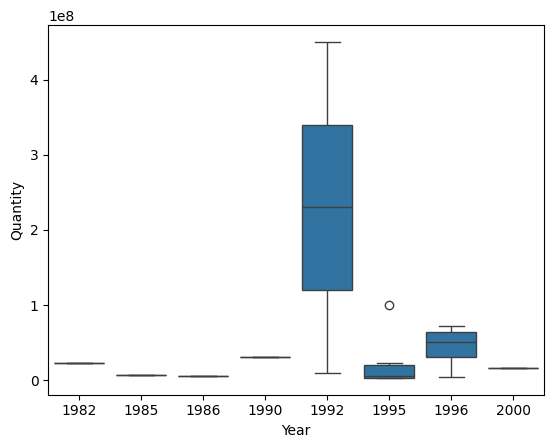

In [32]:
sns.boxplot(x="Year", y="Quantity", data=df2)

Text(0.5, 1.0, 'Bicycles sales')

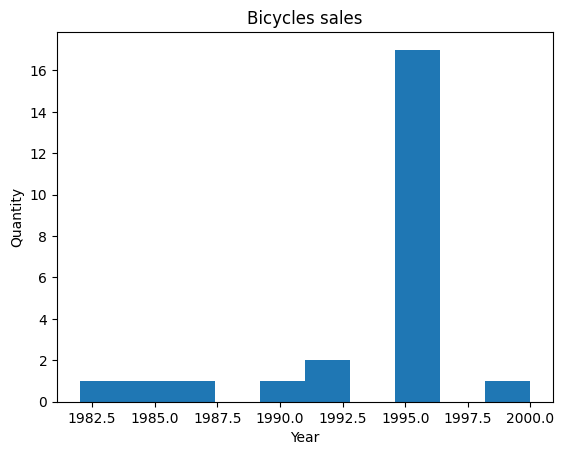

In [33]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df2["Year"])

# set x/y labels and plot title
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Quantity")
plt.pyplot.title("Bicycles sales")

Text(0.5, 1.0, 'Bicycles sales')

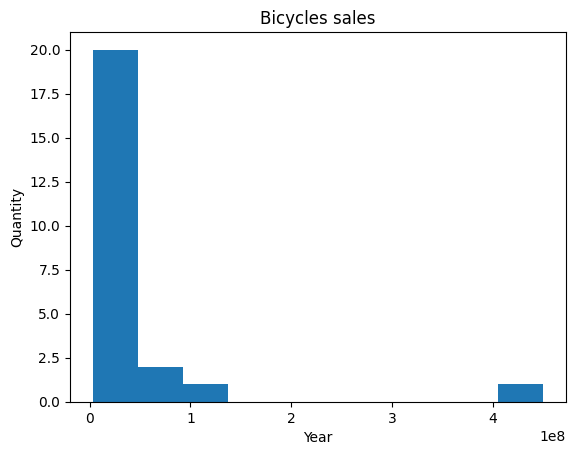

In [34]:
plt.pyplot.hist(df2["Quantity"])

# set x/y labels and plot title
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Quantity")
plt.pyplot.title("Bicycles sales")

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

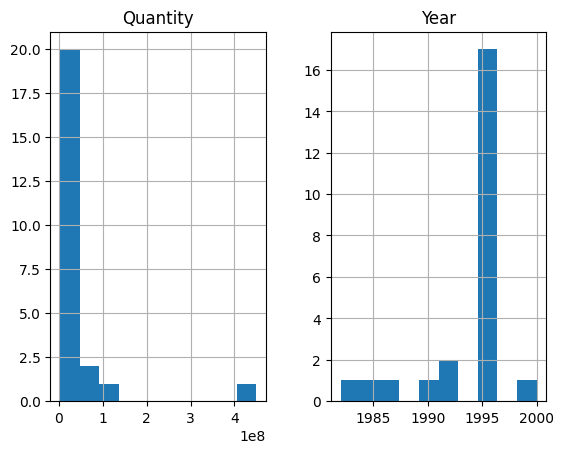

In [35]:
df2.hist()

<h2> Class Activity</h2>

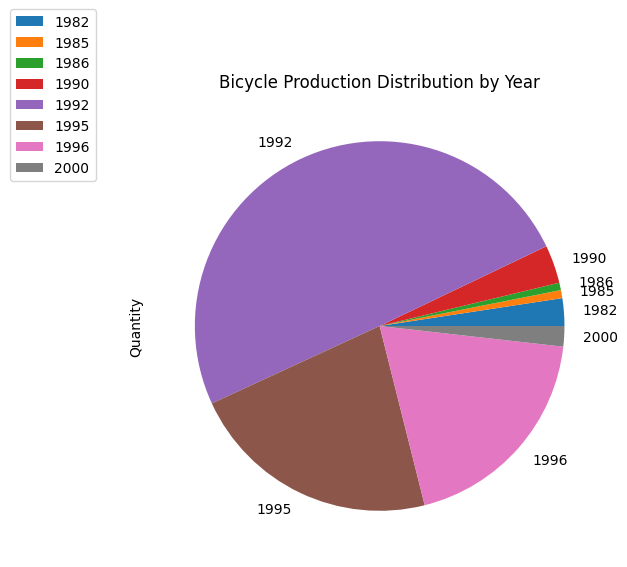

In [47]:
# write codes that can produce this pie chart
import matplotlib.pyplot as plt
year_group = df2.groupby('Year').sum().plot(kind='pie', y='Quantity', figsize=(6, 6))
year_group.legend(loc='center right', bbox_to_anchor=(-0.1 , 1))
plt.title('Bicycle Production Distribution by Year')
plt.show()

In [50]:
df2.sort_values(by='Quantity', ascending=True, inplace=True)
# get top 25 countries
df25 = df2['Quantity'].tail(25)

df25

,Quantity
24,3000000
23,3250000
22,3300000
21,3500000
20,3800000
19,4500000
18,5000000
17,5200000
16,6000000
14,6000000


<h2>Plot a bar graph for the Top 25 Countries Producing bicycles between 1980-2013</h2>

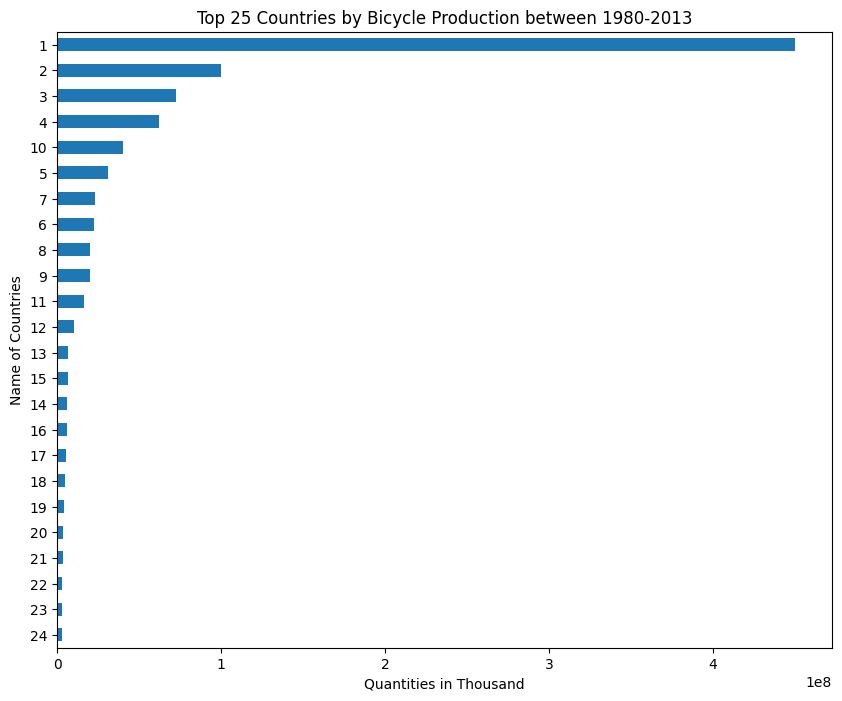

In [60]:

df25.plot(kind='barh', y='Quantity', figsize=(10, 8))
plt.title('Top 25 Countries by Bicycle Production between 1980-2013')
plt.xlabel('Quantities in Thousand')
plt.ylabel('Name of Countries')
plt.show()

In [ ]:
# Write your Conclusion here in Markdown
